## Movie Recommendation System

In this Jupyter Notebook, we are building a movie recommendation system based on plot similarity. The workflow involves the following steps:

1. **Importing Libraries**: We import necessary libraries such as `pandas` for data manipulation, `numpy` for numerical operations, and `sklearn` for machine learning utilities.

2. **Loading Data**: We load the movie dataset from a CSV file (`tmdb_5000_movies.csv`) and select only the required columns (`id`, `title`, `overview`). We also handle missing values by dropping rows with missing overviews.

3. **Text Vectorization**: We use `TfidfVectorizer` from `sklearn` to convert the movie overviews into a TF-IDF matrix. This matrix represents the importance of words in each overview while reducing the impact of common words (stop words).

4. **Cosine Similarity Calculation**: We compute the cosine similarity matrix from the TF-IDF matrix. This matrix helps in measuring the similarity between different movie overviews.

5. **Recommendation Function**: We define a function `get_recommendations` that takes a movie title as input and returns the top 10 recommended movies based on plot similarity. The function uses the cosine similarity matrix to find similar movies and applies the softmax function to convert similarity scores into likelihood percentages.

6. **Testing the Recommendation System**: We test the recommendation function with an example movie title ("The Shawshank Redemption") to see the top recommended movies and their similarity scores.

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

### Load and Preprocess the Movie Dataset

In this cell we read the movie dataset from the CSV file `tmdb_5000_movies.csv` and select only the essential columns: **id**, **title**, and **overview**.  
We then drop any rows where the **overview** is missing to prevent issues during the vectorisation stage. Finally, we display the first few rows of the cleaned dataset to verify that the data has been loaded correctly.


In [2]:
# Specify the CSV file path
csv_file_path = 'tmdb_5000_movies.csv'  # Replace with your actual file path

# Read the CSV file while selecting only the required columns
df = pd.read_csv(csv_file_path, usecols=['id', 'title', 'overview'])

# Optionally drop rows with missing overviews to avoid errors during vectorisation
df.dropna(subset=['overview'], inplace=True)
df.reset_index(drop=True, inplace=True)

# Display the first few rows to verify the correct columns are loaded
df.head()


,id,overview,title
0,19995,"In the 22nd century, a paraplegic Marine is di...",Avatar
1,285,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End
2,206647,A cryptic message from Bond’s past sends him o...,Spectre
3,49026,Following the death of District Attorney Harve...,The Dark Knight Rises
4,49529,"John Carter is a war-weary, former military ca...",John Carter


### Vectorisation and Similarity Computation

In this cell we initialise a `TfidfVectoriser` with English stop words to convert the text in the **overview** column into a TF‑IDF matrix.  
This matrix represents the importance of each word in the context of the entire dataset.  
We then compute the cosine similarity matrix from the TF‑IDF matrix, which quantifies how similar each pair of movie overviews is.  
This similarity matrix is a key component of our plot‐based recommendation system.


In [3]:
# Initialise the TfidfVectoriser using English stop words
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the 'overview' column into a TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(df['overview'])

# Compute cosine similarity matrix from the TF-IDF matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)



### Define Recommendation Functions

In this cell we define two key functions:

1. **softmax(x):**  
   This function applies the softmax transformation to the input array `x`. It normalises the cosine similarity scores so that they form a probability distribution, which is then multiplied by 100 to represent the values as percentages.

2. **get_recommendations(title, cosine_sim=cosine_sim):**  
   This function retrieves and displays the top 10 recommended movies based on plot similarity. It performs the following steps:
   - **Index Retrieval:** Finds the index of the specified movie title in the dataset.
   - **Score Computation:** Enumerates and sorts the cosine similarity scores in descending order, excluding the movie itself.
   - **Likelihood Calculation:** Converts the similarity scores into percentage likelihoods using the softmax function.
   - **Output:** Prints a neatly formatted table showing each recommended movie, its similarity score, and its likelihood percentage, and returns these values as a tuple.


In [4]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def get_recommendations(title, cosine_sim=cosine_sim):
    """
    Given a movie title, return the top recommendations based on plot similarity,
    print each recommended movie with its similarity score,
    and show a "likelihood" (converted cosine similarities using softmax).

    Parameters:
        title (str): The title of the movie.
        cosine_sim (ndarray): Precomputed cosine similarity matrix.
        
    Returns:
        tuple: A tuple containing a list of recommended movie titles and a list of corresponding (index, score) pairs.
    """
    # Retrieve the index for the movie that matches the title
    idx = indices.get(title)
    
    if idx is None:
        print(f"Title '{title}' not found in dataset.")
        return [], []
    
    # Enumerate over similarity scores and sort in descending order
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Exclude the movie itself and take the top 10 recommendations
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    
    # Retrieve the recommended movie titles
    recommended_titles = df['title'].iloc[movie_indices].tolist()
    
    # Convert similarity scores to likelihoods using softmax
    scores = np.array([score for _, score in sim_scores])
    likelihoods = softmax(scores) * 100  # convert to percentage
    
    # Print the results in a neat table
    print("Top 10 Recommendations:")
    print("{:<30} {:>10} {:>15}".format("Movie Title", "Score", "Likelihood (%)"))
    print("-" * 60)
    for rec_title, (_, score), likelihood in zip(recommended_titles, sim_scores, likelihoods):
        print("{:<30} {:>10.4f} {:>15.2f}".format(rec_title, score, likelihood))
    
    return recommended_titles, sim_scores

### Create Mapping and Test the Recommendation Function

In this cell we create a dictionary that maps movie titles to their corresponding indices in the DataFrame.  
This mapping is essential for quickly retrieving the index of a movie when running our recommendation function.  
We then test the recommendation system using an example title ("The Shawshank Redemption").  
If this title is not present in your dataset, please replace it with one that exists.


In [5]:
# Create a mapping from movie titles to their indices
indices = pd.Series(df.index, index=df['title']).to_dict()

# Test the recommendation function with an example title
example_title = "The Shawshank Redemption"  # Replace with an actual title from your dataset
recommendations, sscores = get_recommendations(example_title)




Top 10 Recommendations:
Movie Title                         Score  Likelihood (%)
------------------------------------------------------------
Civil Brand                        0.1884           10.74
Prison                             0.1334           10.17
Escape Plan                        0.1314           10.15
Fortress                           0.1140            9.97
Penitentiary                       0.1084            9.92
The 40 Year Old Virgin             0.1079            9.91
Fatal Attraction                   0.0990            9.83
A Christmas Story                  0.0944            9.78
The Longest Yard                   0.0928            9.77
Toy Story 3                        0.0920            9.76


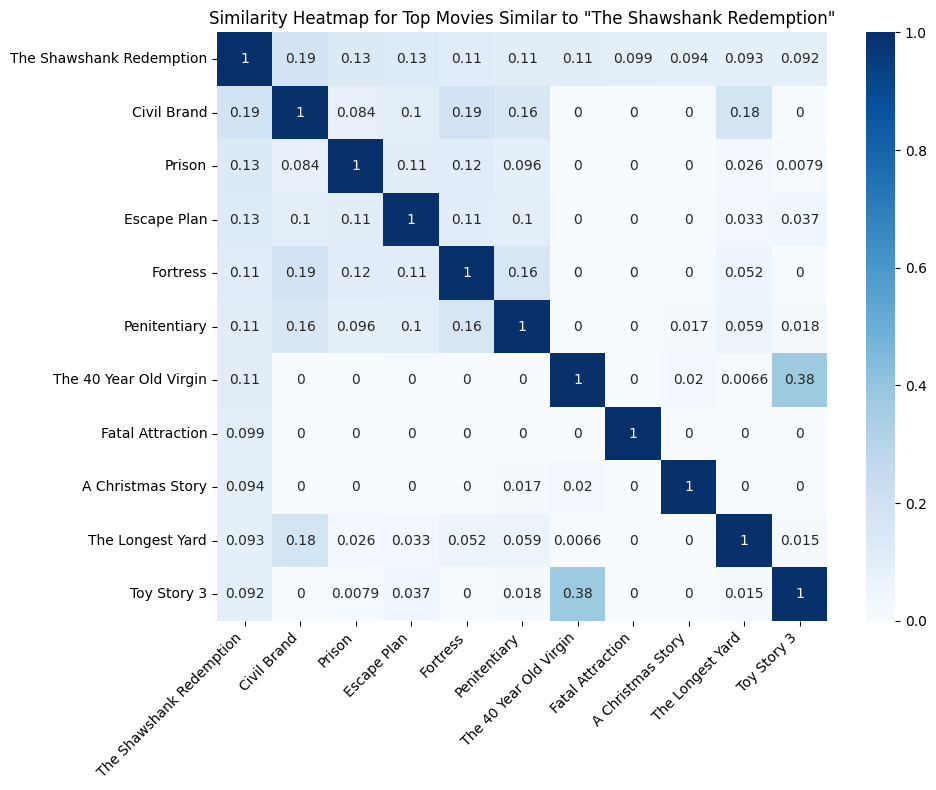

In [13]:
# 1. t-SNE Visualization (better than PCA for high-dimensional data)
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


def plot_similarity_heatmap(title, n=10):
    """Create a heatmap of similarities between top recommended movies"""
    idx = indices.get(title)
    if idx is None:
        print(f"Title '{title}' not found in dataset.")
        return
    
    # Get top similar movies
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[:n+1]  # Include the input movie
    movie_indices = [i[0] for i in sim_scores]
    
    # Create a subset of the cosine similarity matrix
    similarity_subset = cosine_sim[np.ix_(movie_indices, movie_indices)]
    movie_titles = df['title'].iloc[movie_indices].tolist()
    
    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_subset, annot=True, cmap='Blues', 
                xticklabels=movie_titles, yticklabels=movie_titles)
    plt.title(f'Similarity Heatmap for Top Movies Similar to "{title}"')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Test the heatmap visualization
plot_similarity_heatmap(example_title)